<h1 align="center">  Neural Network to classify MNIST Dataset</h1>
<hr>

### Objective:

* TOPIC:   Neural Network to classify MNIST Dataset and then classify the digit present in the Image provided by the User.
<hr>

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from keras.layers import Input
from sklearn.metrics import precision_score
import tensorflow as tf

import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
from PIL import Image, ImageTk


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


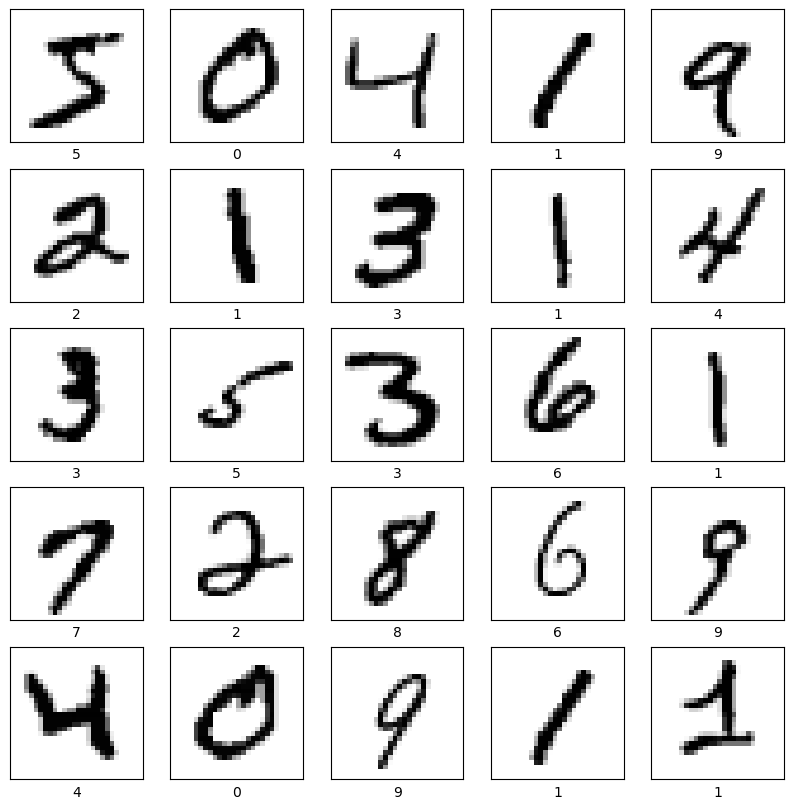

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(str(np.argmax(y_train[i])))
plt.show()

In [4]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 26, 26, 32)    │          320 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 13, 13, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 11, 11, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 5, 5, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 1600)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 64)            │      102,464 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 10)            │          650 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9005 - loss: 0.3295 - val_accuracy: 0.9849 - val_loss: 0.0454
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9836 - loss: 0.0508 - val_accuracy: 0.9829 - val_loss: 0.0500
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9893 - loss: 0.0327 - val_accuracy: 0.9887 - val_loss: 0.0316
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9933 - loss: 0.0234 - val_accuracy: 0.9849 - val_loss: 0.0411
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9947 - loss: 0.0168 - val_accuracy: 0.9887 - val_loss: 0.0359


In [7]:
y_train_pred = model.predict(X_train)
y_train_pred = tf.argmax(y_train_pred, axis=1)
y_train_true = tf.argmax(y_train, axis=1)
train_precision = precision_score(y_train_true, y_train_pred, average='weighted')

y_test_pred = model.predict(X_test)
y_test_pred = tf.argmax(y_test_pred, axis=1)
y_test_true = tf.argmax(y_test, axis=1)
test_precision = precision_score(y_test_true, y_test_pred, average='weighted')

print(f'Training Precision: {train_precision}, Test Precision: {test_precision}')


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Training Precision: 0.9937355469250486, Test Precision: 0.9887852235323089


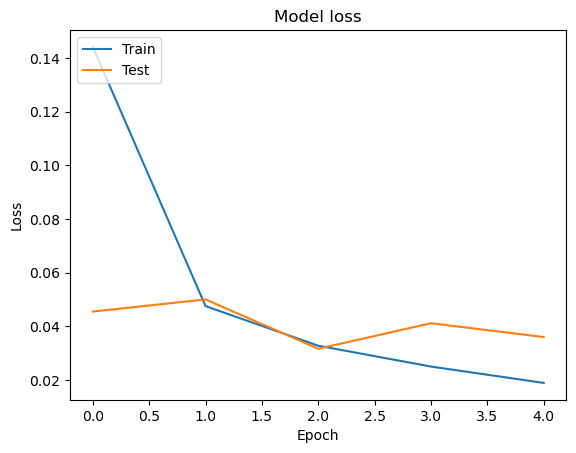

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

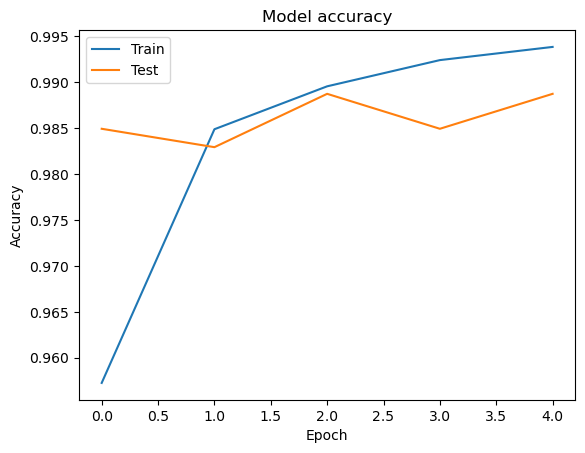

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9858 - loss: 0.0449
Test Loss: 0.03594667464494705, Test Accuracy: 0.9886999726295471


In [11]:
model.save('my_model.keras')

In [12]:
model = load_model('my_model.keras')

In [13]:
#GUI 
root = tk.Tk()
root.title('MNIST Digit Classifier')

''

In [14]:
instructions_label = tk.Label(root, text='Select an image containing a digit to classify:', pady=10)
instructions_label.pack()

In [15]:
def show_image():
    index = int(image_index.get())
    if 0 <= index < len(X_train):
        plt.imshow(X_train[index].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.show()

In [16]:
def classify_image():
    file_path = filedialog.askopenfilename(title='Select an image', filetypes=[('Image files', '*.png *.jpg *.jpeg')])
    if file_path:
        image = Image.open(file_path).convert('L').resize((28, 28))
        image_array = np.array(image) / 255.0
        image_array = image_array.reshape(1, 28, 28, 1) 
        
        image_label.config(image=ImageTk.PhotoImage(image))
        image_label.image = ImageTk.PhotoImage(image)

        prediction = model.predict(image_array)
        predicted_digit = np.argmax(prediction)

        result_label.config(text=f"Predicted Digit: {predicted_digit}")

In [17]:
root = tk.Tk()
root.title('MNIST Digit Classifier')


classify_button = tk.Button(root, text='Classify Image', command=classify_image)
classify_button.pack(pady=10)


ttk.Label(root, text='Select Image Index to show from MNIST:').pack()
image_index = ttk.Combobox(root, values=[str(i) for i in range(len(X_train))])
image_index.pack()


image_label = tk.Label(root)
image_label.pack()


show_image_button = ttk.Button(root, text='Show Image', command=show_image)
show_image_button.pack()

result_label = tk.Label(root, text='')
result_label.pack(pady=10)
root.mainloop()